# pyXRD

In this notebook a presentation on how to use the pyXRD code is shown

In [1]:
from pyXRD import pyXRDCodes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

To use it we need a structure that you want to simulate, bellow we define one

In [2]:
Atoms = ['Na','F']
Positions = [ [[0,0,0 ]], # Na element positions
            [[1/2,1/2,1/2]] # F element positions
]
 #Let's give the unit cell parameters
abc = np.array([4.614,4.614,4.614])
angles = np.array([90,90,90])

# Define a group symmetry for the system
simnumb = 225 # Same as F m -3 m
simmetry =  pyXRDCodes.get_symmetry_operations_number(simnumb) # Give us based on the group symmmetry the symmetry operations

In [3]:
print(simmetry) # To show what symmetry operations are

['x,y,z', '-y,x,z', '-x,-y,z', 'y,-x,z', 'x,-y,-z', 'y,x,-z', '-x,y,-z', '-y,-x,-z', 'z,x,y', '-x,z,y', '-z,-x,y', 'x,-z,y', 'z,-x,-y', 'x,z,-y', '-z,x,-y', '-x,-z,-y', 'y,z,x', 'y,-z,-x', 'z,y,-x', '-y,z,-x', '-z,-y,-x', '-y,-z,x', 'z,-y,x', '-z,y,x', '-x,-y,-z', 'y,-x,-z', 'x,y,-z', '-y,x,-z', '-x,y,z', '-y,-x,z', 'x,-y,z', 'y,x,z', '-z,-x,-y', 'x,-z,-y', 'z,x,-y', '-x,z,-y', '-z,x,y', '-x,-z,y', 'z,-x,y', 'x,z,y', '-y,-z,-x', '-y,z,x', '-z,-y,x', 'y,-z,x', 'z,y,x', 'y,z,-x', '-z,y,-x', 'z,-y,-x', 'x,y+1/2,z+1/2', '-y,x+1/2,z+1/2', '-x,-y+1/2,z+1/2', 'y,-x+1/2,z+1/2', 'x,-y+1/2,-z+1/2', 'y,x+1/2,-z+1/2', '-x,y+1/2,-z+1/2', '-y,-x+1/2,-z+1/2', 'z,x+1/2,y+1/2', '-x,z+1/2,y+1/2', '-z,-x+1/2,y+1/2', 'x,-z+1/2,y+1/2', 'z,-x+1/2,-y+1/2', 'x,z+1/2,-y+1/2', '-z,x+1/2,-y+1/2', '-x,-z+1/2,-y+1/2', 'y,z+1/2,x+1/2', 'y,-z+1/2,-x+1/2', 'z,y+1/2,-x+1/2', '-y,z+1/2,-x+1/2', '-z,-y+1/2,-x+1/2', '-y,-z+1/2,x+1/2', 'z,-y+1/2,x+1/2', '-z,y+1/2,x+1/2', '-x,-y+1/2,-z+1/2', 'y,-x+1/2,-z+1/2', 'x,y+1/2,-z+

Once we define the basic information about the atom we can apply the symmemtries to obtain the primitive unit cell, the unit cell and possibibly sistems with multiple unit cells

In [4]:
Pos_primit,Pos_unit,Pos_tot = pyXRDCodes.find_atoms_unit_cell(Positions,abc,angles,simmetry,units=[1,1,1] )

To show what this atomic positions mean we can plot it

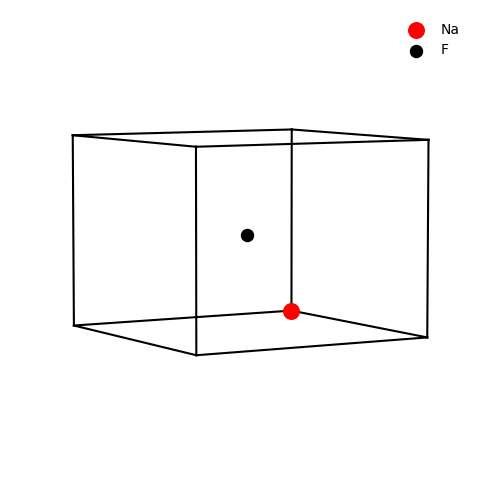

In [5]:
cores = ['red', 'black'] # Define the atoms colors
Z = [25,15] # Define the size of the atoms, later on we can use real values

#Plot it
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1,1,figure=fig)
ax1 = fig.add_subplot(gs[0], projection='3d')

# Plot each atom positions
POS_ideal = Positions
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atoms[i]}')
    
# Add the unit cell to make it visible
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angles, xyz=False)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)

We can also plot the primit unit cell and the unit cell ( This ones are in cartesian coordinates, so we use the xyz = True)

Text(0.5, 0.92, 'Unit Cell positions')

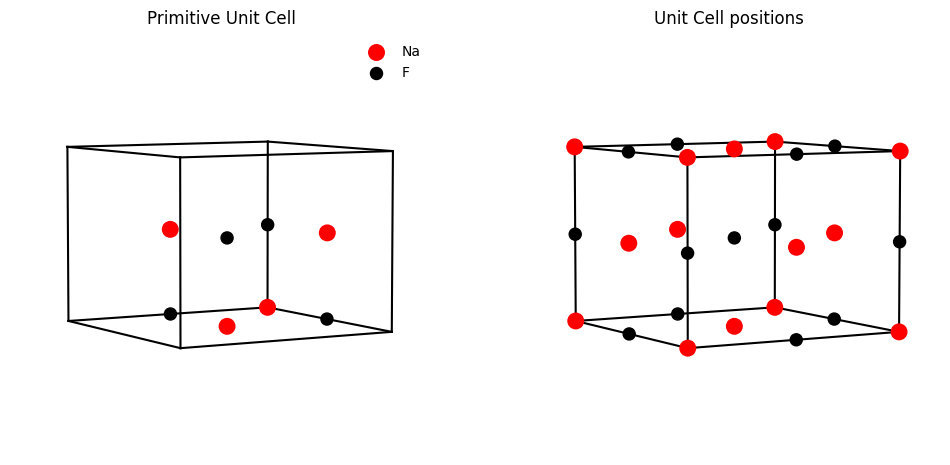

In [6]:
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(1,2,figure=fig)
ax1 = fig.add_subplot(gs[0], projection='3d')

POS_ideal = Pos_primit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atoms[i]}')
    
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angles, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)
ax1.set_title('Primitive Unit Cell')


ax1 = fig.add_subplot(gs[1], projection='3d')

# Now present the unit cell positions
POS_ideal = Pos_unit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atoms[i]}')
    
# Add Unit cell
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angles, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.set_title('Unit Cell positions')

#ax1.legend(frameon=False)

Using this informations we have we can obtain the Difraction pattern expected

In [7]:
lamb = 1.54 # The wavelenght of the source in angstrom
max_order = 10 # Max order of the h,k,l
# Let's run this code, the first time we run it will take some time
data = pyXRDCodes.simulate_xrd(lamb,max_order,abc,angles,Pos_primit,Atoms)
data.keys() # Show the variables it give

dict_keys(['hkls', 'two_thetas', 'FsB', 'intensities', 'G', 'multiplicities', 'Lp', 'fhkls', 'Zs'])

Let's see what it looks like

Text(0, 0.5, 'Intensities')

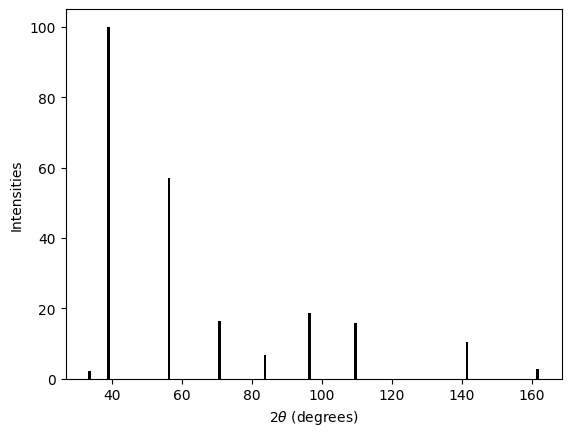

In [8]:
theta2 = data['two_thetas']
I = data['intensities']

plt.bar(theta2,I,color='black')
plt.xlabel(r'2$\theta$ (degrees)')
plt.ylabel('Intensities')

We can even plot them beside each other

Text(0.5, 1.0, 'Calculated Pattern')

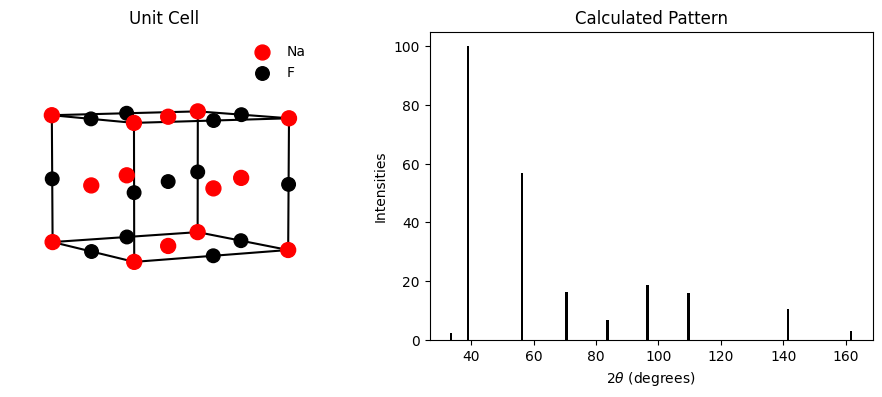

In [9]:
cores = ['red', 'black', 'gray'] #Definir cores que átomos terão
Z = data['Zs'] #Usando tamanhos fornecidos no calculo da estrutura
#Fazer plots
fig = plt.figure(figsize=(12, 4))

gs = GridSpec(1,2,figure=fig,width_ratios=[1,1],wspace=0.1)
ax1 = fig.add_subplot(gs[0], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Pos_unit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atoms[i]}')
    
# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angles, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)
ax1.set_title('Unit Cell')

#Plotar gráfico
ax1 = fig.add_subplot(gs[1])

ax1.bar(theta2,I,color='black')
ax1.set_xlabel(r'2$\theta$ (degrees)')
ax1.set_ylabel('Intensities')
ax1.set_title('Calculated Pattern')

#plt.tight_layout()
#ax1.legend(frameon=False)

---

Usually instead of giving the inforamtion we use CIF files to have such info, below we show how to from this files obtain the pattern

In [10]:
# Obtain the relevant information
abc,angles,Positions,simemmetry,Atoms = pyXRDCodes.INFOS_COD('NaF.txt')
#Definir posições
Pos_primit,Pos_unit,Pos_tot = pyXRDCodes.find_atoms_unit_cell(Positions,abc,angles,simemmetry,units=[1,1,1] )

Text(0.5, 0.92, 'Unit Cell positions')

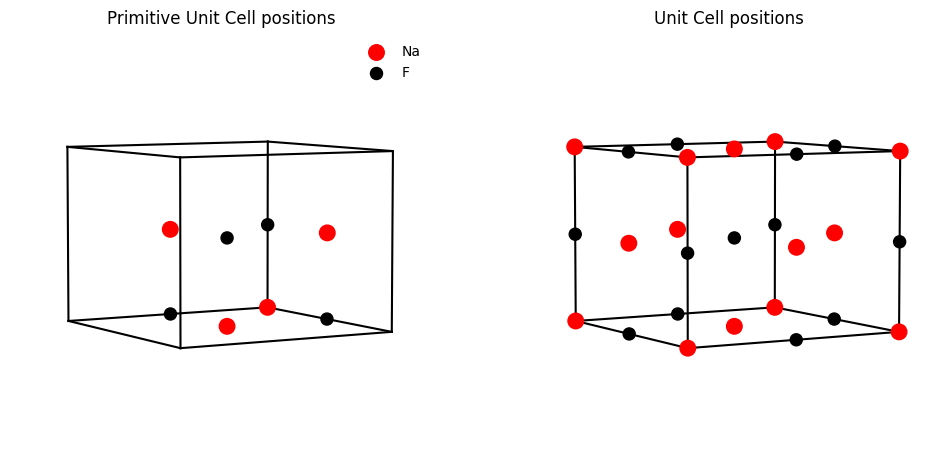

In [11]:
cores = ['red', 'black'] 
Z = [25,15] 


fig = plt.figure(figsize=(12, 12))
gs = GridSpec(1,2,figure=fig)
ax1 = fig.add_subplot(gs[0], projection='3d')


POS_ideal = Pos_primit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atoms[i]}')
    

pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angles, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)
ax1.set_title('Primitive Unit Cell positions')

#Plotar célula unitaria
ax1 = fig.add_subplot(gs[1], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Pos_unit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atoms[i]}')
    
# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angles, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.set_title('Unit Cell positions')

#ax1.legend(frameon=False)

In [12]:
# Calculate the pattern ass done before
lamb = 1.54 
max_order = 10 
data = pyXRDCodes.simulate_xrd(lamb,max_order,abc,angles,Pos_primit,Atoms)
theta2 = data['two_thetas']
I = data['intensities']

Text(0.5, 1.0, 'Calculated Pattern')

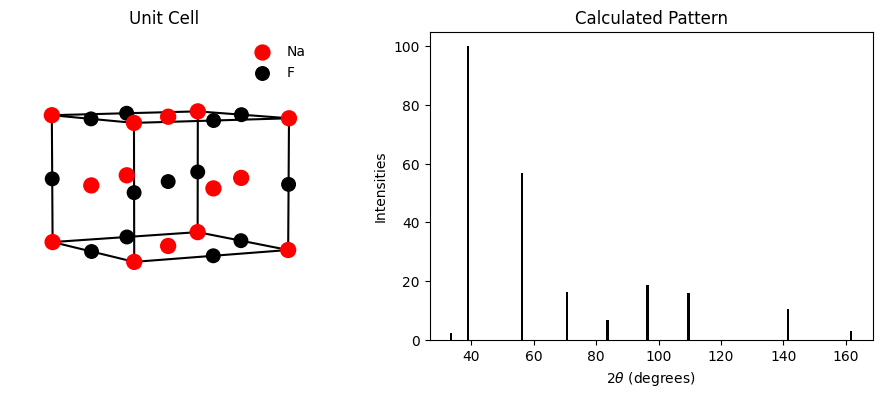

In [13]:
cores = ['red', 'black', 'gray'] #Definir cores que átomos terão
Z = data['Zs'] #Usando tamanhos fornecidos no calculo da estrutura
#Fazer plots
fig = plt.figure(figsize=(12, 4))

gs = GridSpec(1,2,figure=fig,width_ratios=[1,1],wspace=0.1)
ax1 = fig.add_subplot(gs[0], projection='3d')

# Apresentar posições que fornecemos
POS_ideal = Pos_unit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=1, label=f'{Atoms[i]}')
    
# Adicionar célula unitária
pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angles, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)
ax1.set_title('Unit Cell')

#Plotar gráfico
ax1 = fig.add_subplot(gs[1])

ax1.bar(theta2,I,color='black')
ax1.set_xlabel(r'2$\theta$ (degrees)')
ax1.set_ylabel('Intensities')
ax1.set_title('Calculated Pattern')

#plt.tight_layout()
#ax1.legend(frameon=False)

Even more we can show the planes we have

Text(0.5, 1.0, 'Calculated Pattern')

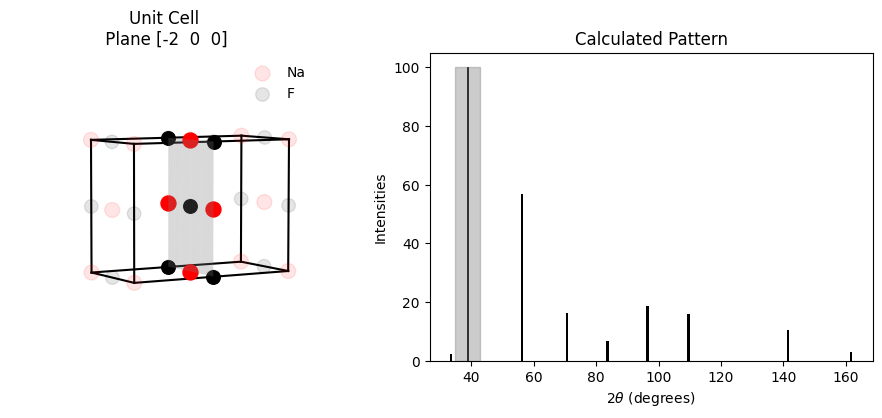

In [14]:
hkls = data['hkls']
ff = 7 # Select one hkl


fig = plt.figure(figsize=(12, 4))
gs = GridSpec(1,2,figure=fig,width_ratios=[1,1],wspace=0.1)
ax1 = fig.add_subplot(gs[0], projection='3d')


POS_ideal = Pos_unit
for i in range(len(POS_ideal)):
    points = POS_ideal[i]
    x, y, z = np.array(points)[:, 0], np.array(points)[:, 1], np.array(points)[:, 2]
    ax1.scatter(x, y, z, s=5*Z[i], color=cores[i], alpha=0.1, label=f'{Atoms[i]}')
    

#  Plot the surface
X,Y,Zi = pyXRDCodes.Plot_Planes(ax1,abs(hkls[ff]),abc,angles,1,Limits=True,Positions=POS_ideal , color = 'gray')
# Show the atos in this plane
for i in range(len(POS_ideal)):
    pyXRDCodes.plot_points_on_surface(ax1 , POS_ideal[i], X,Y,Zi,5*Z[i] , cores[i],threshold=0.5) # You can play with the threshold it atoms do not appear

pyXRDCodes.UNIT_CELL_PLOT(ax1, abc, angles, xyz=True)
ax1.set_axis_off()
ax1.view_init(elev=5, azim=60)
ax1.legend(frameon=False)
ax1.set_title(f'Unit Cell\n Plane {hkls[ff]}')


ax1 = fig.add_subplot(gs[1])
ax1.bar(theta2,I,color='black')
ax1.fill_betweenx(np.linspace(0,100,100),theta2[ff]-4 , theta2[ff] + 4 , color = 'gray',alpha = 0.4)
ax1.set_xlabel(r'2$\theta$ (degrees)')
ax1.set_ylabel('Intensities')
ax1.set_title('Calculated Pattern')

#plt.tight_layout()
#ax1.legend(frameon=False)